# Density profile of Hyades

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rc('text',usetex=True)
plt.rc('axes', labelsize=20)
plt.rc('figure', dpi=100)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

![](reino2018_fig4.jpeg)

## Integrating Reino profile

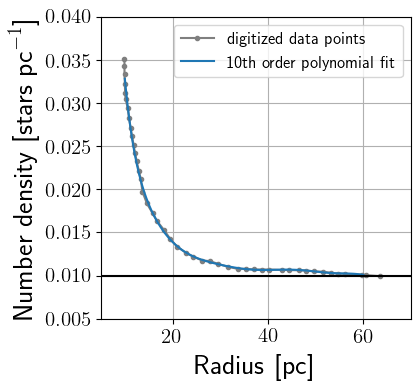

In [3]:
d_fig4 = pd.read_csv("reino_fig4_blue.txt", header=None)
x, y = d_fig4[0], d_fig4[1]

p_poly = np.polyfit(x, y, 10)
xp = np.linspace(10, 60, 101)
fig, ax = plt.subplots(figsize=(4,4))
plt.plot(x, y, '.-',color='C7', label='digitized data points')
plt.plot(xp, np.poly1d(p_poly)(xp), '-', color='C0',label='10th order polynomial fit')
plt.legend(loc='upper right', fontsize=12, frameon=True, facecolor='w');
plt.axhline(0.01, c='k')
plt.xlim(5, 70)
plt.ylim(0.005, 0.040);
plt.grid();
plt.xlabel('Radius [pc]')
plt.ylabel('Number density [stars pc$^{-1}$]');

In [4]:
from scipy.integrate import quad

n_10_60 = quad(lambda x:(np.poly1d(p_poly)(x) - 0.01)*4*np.pi*x**2, 10, 60)[0]
print(f'N stars between 10 and 60 pc = {n_10_60:.2f}')

print('40 stars within 10 pc = {:.3f} pc^-3'.format(40/(np.pi*4/3*10**3)))

N stars between 10 and 60 pc = 779.94
40 stars within 10 pc = 0.010 pc^-3


From Stella Reino's email: the density is average density within sphere of radius $r$ not at radius $r$ so you multiply density by volume of sphere of radius $r$ to get number of stars.

In [11]:
from scipy.integrate import quad

n_enclosed = lambda x:np.poly1d(p_poly)(x)*4*np.pi/3*x**3
n_enclosed_bg = lambda x:0.01*4*np.pi/3*x**3
n_10_60 = n_enclosed(40)-n_enclosed(10)
n_10_60_bg = n_enclosed_bg(40)-n_enclosed_bg(10)
print(f'N stars between 10 and 60 pc = {n_10_60:.2f}')
print(f'N stars between 10 and 60 pc bg = {n_10_60_bg:.2f}')
print(f'N stars between 10 and 60 pc cl = {n_10_60-n_10_60_bg:.2f}')

print('40 stars within 10 pc = {:.3f} pc^-3'.format(40/(np.pi*4/3*10**3)))

N stars between 10 and 60 pc = 2715.44
N stars between 10 and 60 pc bg = 2638.94
N stars between 10 and 60 pc cl = 76.50
40 stars within 10 pc = 0.010 pc^-3


In [5]:
# digitized data points
print(d_fig4.to_csv(index=False))

0,1
9.917813560279974,0.03514198763042687
9.923617687378847,0.034233641739453376
9.929421814477717,0.033325295848479874
10.013625628071203,0.03214169362690835
10.050859982823663,0.031112234950471718
10.177680159934024,0.03045574860199542
10.567216235456057,0.02946482581184252
10.881351423484563,0.028279847308618
11.195117257970411,0.027152672634819068
11.508219763644965,0.026129308919988537
11.821039600791972,0.0251501828297184
12.13367099225395,0.0242005484891552
12.445906647777369,0.02331284682297656
12.951888023220524,0.022089676503881564
13.340929428819365,0.021176169556709357
13.695148270357961,0.01971524658206031
14.623553576350439,0.01835135146394708
15.831603484792971,0.017202156283700303
16.80832375181757,0.016273166167931955
18.20699746333121,0.015277082321580338
19.55500598204427,0.014213904744645444
20.95098806102343,0.013353482946945716
22.86078914280032,0.012613508136117243
24.319666682300266,0.01219077071474993
26.238599242373727,0.011735190208481714
27.771792193669054,0